# [24차시] 프로젝트 8 : 2레이어 인공신경망 구현하기 (2)
지금까지 배운 파이썬 프로그래밍을 활용하는 코드를 만들어봅시다. 코드 편집기를 사용해 주어진 문제를 해결하기 위한 나만의 코드를 작성해보세요!

* 본 프로젝트는 앞선 '**[23차시] 프로젝트 7 : 2레이어 인공신경망 구현하기 (1)**'와 이어집니다. 선행 프로젝트에서 작성한 코드를 가져와 사용해보세요.

### [TODO] 코드 구현 : 손실함수 만들기

In [68]:
import numpy as np

# 입력 데이터
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4)  # 입력 데이터
Y = np.array([0, 1, 1, 0]).reshape(1,4)  # 정답 레이블

# 가중치 초기화 함수
def init_parameters(num_hidden_units=2):
    W1 = np.random.randn(num_hidden_units, 2)  # 첫번째 레이어 가중치
    B1 = np.zeros((num_hidden_units, 1))  # 첫번째 레이어 바이어스
    W2 = np.random.randn(1, num_hidden_units)  # 두번째 레이어 가중치
    B2 = np.zeros((1, 1))  # 두번째 레이어 바이어스
    return W1, B1, W2, B2

# Affine 변환 함수
def affine(W, X, B):
    return np.dot(W, X) + B

# Sigmoid 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 임의로 w, b, x를 만들고 affine 함수를 테스트 해봅니다
w = np.arange(4).reshape(2,2)
b = [[1],[2]]
x = [[1],[1]]

print(affine(w, x, b)) # affine test -> [[3],[6]]
print(sigmoid(0.1)) # sigmoide test -> 0.524979

[[2]
 [7]]
0.52497918747894


In [69]:
# # 모델 세팅
# import numpy as np # numpy import
# X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
# Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답

# print(X)
# print(Y)

# # 가중치 초기화 함수
# def init_parameters(num_hidden_units = 2):
#   W1 = np.random.randn(2, num_hidden_units) # 첫번째 레이어 가중치
#   B1 = np.zeros((num_hidden_units,1)) # 첫번째 레이어 바이어스
#   W2 = np.random.randn(num_hidden_units, 1) # 두번째 레이어 가중치
#   B2 = np.zeros((1, 1)) # 두번째 레이어의 바이어스
#   return W1, B1, W2, B2 # 가중치 파라미터 리턴

# # 포워딩 연산 : 어파인 변환 연산과 시그모이드 함수

# # (프로젝트 7) 미션 코드 작성 : Affine transform을 구현하세요.
# def affine(W, X, B):
#   return np.dot(W, X) + B # '...'에 코드를 채워주세요.

# # (프로젝트 7) 미션 코드 작성 : sigmoid function을 구현하세요.
# def sigmoid(z):
#   return 1 / (1 + np.exp(-z)) # '...'에 코드를 채워주세요.





# # 임의로 w, b, x를 만들고 affine 함수를 테스트 해봅니다
# w = np.arange(4).reshape(2,2)
# b = [[1],[2]]
# x = [[1],[1]]

# print(affine(w, x, b)) # affine test -> [[3],[6]]
# print(sigmoid(0.1)) # sigmoide test -> 0.524979

In [70]:
## 코드시작 ##
# 미션 1 코드 작성 : 손실함수(이진 크로스 엔트로피)를 구현하세요.
def binary_cross_entropy(Y, YHat):
    N = Y.shape[1]  # 총 샘플의 수
    loss = -(1/N) * np.sum(Y * np.log(YHat) + (1 - Y) * np.log(1 - YHat))
    return loss


## 코드종료 ##

In [71]:
# 정답 확인
Y = np.array([0, 1, 1, 0]).reshape(1, 4) # 정답
YHat = np.array([0.5, 0.5, 0.5, 0.5]).reshape(1, 4) # 추정값

loss = binary_cross_entropy(Y, YHat)
print("2진 크로스엔트로피 비용:", loss)

2진 크로스엔트로피 비용: 0.6931471805599453


### [TODO] 코드 구현 : 순방향 연산 구현하기

In [57]:
# ## 코드시작 ##
# # 미션 2~4 코드 작성 : 2레이어 순방향 연산을 구현해보세요.
# def forward_loss(X, Y, _params):
#   W1, B1, W2, B2 = _params

#   # 첫번째 레이어연산
#   Z1 = ... # 1) affine 함수  - '...'에 채워주세요
#   H = ... # 2) sigmoid 함수 - '...'에 채워주세요

#   # 두번째 레이어 연산
#   Z2 = ... # 3) affine 함수 - '...'에 채워주세요
#   YHat = ... # 4) sigmoid 함수  - '...'에 채워주세요

#   # 손실함수 계산
#   loss = ... # 5) 이진크로스 엔트로피 함수 - '...'에 채워주세요

#   return Z1, H, Z2, YHat, loss

# ## 코드종료 ##

In [58]:
# # 가정: W2의 초기화가 (1, 2)로 변경되었다고 가정합니다.
# def forward_loss(X, Y, _params):
#     W1, B1, W2, B2 = _params
    
#     # 첫 번째 레이어 연산
#     Z1 = affine(W1, X, B1)  # X의 전치 필요 여부는 X의 형태에 따라 다름
#     A1 = sigmoid(Z1)
    
#     # 두 번째 레이어 연산
#     Z2 = affine(W2, H, B2)  # A1이 이미 적절한 형태로 가정
#     Y_hat = sigmoid(Z2)
    
#     # 손실 계산
#     loss = binary_cross_entropy(Y, Y_hat)
    
#     return Z1, H, Z2, Y_hat, loss

# # affine 함수
# def affine(W, X, B):
#     return np.dot(W, X) + B  # X는 (num_features, num_samples), W는 (num_output_units, num_features)


In [59]:
# def forward_loss(X, Y, _params):
#     W1, B1, W2, B2 = _params

#     # 첫번째 레이어연산
#     Z1 = affine(W1, X, B1)   # 1) affine 함수
#     A1 = sigmoid(Z1)  # 2) sigmoid 함수 - 여기서 H 대신 A1 사용

#     # 두번째 레이어 연산
#     Z2 = affine(W2, A1, B2)  # 3) affine 함수 - 여기서도 A1을 사용
#     YHat = sigmoid(Z2)  # 4) sigmoid 함수

#     # 손실함수 계산
#     loss = binary_cross_entropy(Y, YHat)  # 5) 이진크로스 엔트로피 함수

#     return Z1, A1, Z2, YHat, loss


In [73]:
# 순방향 연산 및 손실 계산
def forward_loss(X, Y, _params):
    W1, B1, W2, B2 = _params

    # 첫번째 레이어 연산
    Z1 = affine(W1, X, B1)  # 1) affine 함수
    H = sigmoid(Z1)  # 2) sigmoid 함수

    # 두번째 레이어 연산
    Z2 = affine(W2, H, B2)  # 3) affine 함수
    YHat = sigmoid(Z2)  # 4) sigmoid 함수

    # 손실함수 계산
    loss = binary_cross_entropy(Y, YHat)  # 5) 이진 크로스 엔트로피 함수

    return Z1, H, Z2, YHat, loss


In [75]:
np.random.seed(42) # random seed로 고정
W1, B1, W2, B2 = init_parameters(num_hidden_units = 2) # 파라미터 초기화
forward_loss(X, Y, [W1, B1, W2, B2])[-1] # loss출력 : 0.70492209

0.7065297557849064

### [TODO] 코드 구현 : 역방향 그레디언트 계산하기

In [76]:
def get_gradients(X, Y, _params):
    W1, B1, W2, B2 = _params
    m = X.shape[1]  # 샘플의 수

    # 포워드 패스
    Z1, H, Z2, YHat, loss = forward_loss(X, Y, _params)

    # dLoss/dZ2
    dLdZ2 = (1/m) * (YHat - Y)

    # dLoss/dW2
    dLdW2 = np.dot(dLdZ2, H.T)

    # dLoss/dB2
    dLdB2 = np.sum(dLdZ2, axis=1, keepdims=True)

    # dLoss/dH
    dLdH = np.dot(W2.T, dLdZ2)

    # dLoss/dZ1
    dLdZ1 = dLdH * H * (1 - H)

    # dLoss/dW1
    dLdW1 = np.dot(dLdZ1, X.T)

    # dLoss/dB1
    dLdB1 = np.sum(dLdZ1, axis=1, keepdims=True)

    return [dLdW1, dLdB1, dLdW2, dLdB2], loss


In [ ]:
## 코드시작 ##
# 미션 5~9 코드 작성 : 역방향 그레디언트를 구현하세요.

def get_gradients(X, Y, _params):
  W1, B1, W2, B2 = _params
  m = X.shape[1] # 샘플의 수
  # 포워드 함수 통과 후 출력
    # - Z1 : 첫번재 레이어 affine 결과
    # - H : 첫번재 레이어 sigmoid 통과한 결과
    # - Z2 : 두번재 레이어 affine 통과한 결과
    # - YHat : 두번재 레이어 sigmoid 통과한 결과
    # - loss : 크로스엔트로피 손실값
  Z1, H, Z2, YHat, loss = forward_loss(X, Y, _params)

  # 1) dLoss/dZ2 구현. 손실함수가 각 샘플 손실의 평균으로 계산되기 때문에 그대로 구현하였습니다.
  dLdZ2 = (1/m)*(YHat-Y) # 그림에서 1의 구현

  # 2) dLoss/dW2의 구현 - '...'을 구현하세요.
  dLdW2 = ... # 그림에서 2의 구현 (초록색 2번 참고)

  # 3) dLoss/dB2의 구현 - 샘플마다 gradient가 있음. 따라서 합쳐줘야 함.
  dLdB2 = np.sum(dLdZ2, axis=1, keepdims=True) # 그림에서 3의 구현

  # 4) dLoss/dH의 구현 - '...'을 구현하세요.
  dLdH = ... #  그림에서 4의 구현

  # 5) dLoss/dZ1의 구현 - '...'을 구현하세요.
  dLdZ1 = ... # 그림에서 5의 구현

  # 6) dLoss/dW1의 구현 - '...'을 구현하세요.
  dLdW1 = ... # 그림에서 6의 구현

  # 7) dLoss/dB2의 구현 - '...'을 구현하세요.
  dLdB1 = ...

  return [dLdW1, dLdB1, dLdW2, dLdB2], loss
## 코드종료 ##

In [82]:
# 모델 학습하기
def optimize (X, Y, _params, learning_rate = 0.1, iteration = 1000):

    params = [np.copy(param) for param in _params] # 파라미터 복사
    loss_trace = [] # 손실 값 저장

    for epoch in range(iteration): # 학습 반복
        dparams, loss = get_gradients(X, Y, params) # 그레디언트 추출
        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam # 경사하강법 구현

        if (epoch % 100 == 0): # 손실값 저장
            loss_trace.append(loss)

    Z1, H, Z2, Y_hat_predict, loss = forward_loss(X, Y, params)


    return params,loss_trace, Y_hat_predict


X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답

params = init_parameters(2) # 파라미터 세팅
new_params, loss_trace, Y_hat_predict = optimize(X, Y, params, 0.1, 150000) # 학습 및 추론

print(Y_hat_predict) # 정답 Y와 유사한 값이 나왔다면 학습이 잘 진행된 것 입니다.

[[7.34496911e-04 9.99438121e-01 9.99438186e-01 6.51816303e-04]]


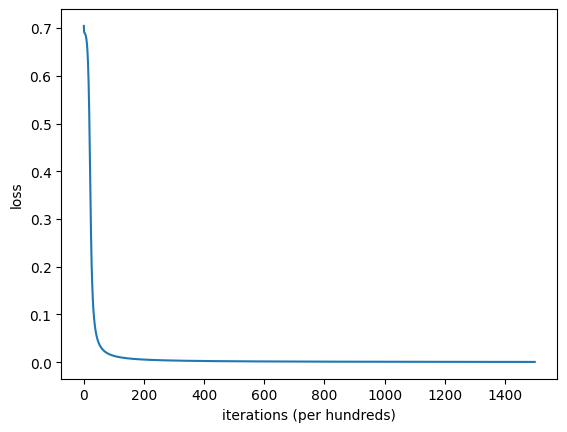

In [83]:
# 손실함수 값 출력하기
import matplotlib.pyplot as plt

# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

ALL RIGHTS RESERVED. (C)NAVER Connect Foundation.